# Predicting Online Shopper's Purchase Intention
<b> Goal : To predict whether a visitor will make a purchase ('Revenue' attribute) </b>

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
data = pd.read_csv("online_shoppers_intention.csv")
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Data Exploration 

<u><b> Identify data type </b></u>
- identify data type of each attributes (categorical, nominal, ordinal, binary, quantitative, integer and continuous)<br>
- explain attribute and display its value representation <br> 
- to make preprocesing steps easier 

In [36]:
# Identify the data types of all attributes 
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

<h3><u> Check for missing values</u> </h3> 


In [37]:
# Check if there is any missing values in the dataset
print(data.isnull().any())

Administrative             False
Administrative_Duration    False
Informational              False
Informational_Duration     False
ProductRelated             False
ProductRelated_Duration    False
BounceRates                False
ExitRates                  False
PageValues                 False
SpecialDay                 False
Month                      False
OperatingSystems           False
Browser                    False
Region                     False
TrafficType                False
VisitorType                False
Weekend                    False
Revenue                    False
dtype: bool


<h3> Descriptive Analytics </h3>

- Administrative, Administrative_Duration, Informational have wide ranges of values, indicating diverse users
- Month and Visitor Type are Categorical 
- Weekend and Revenue are Binary

In [38]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


<h3> Distribution for Numerical Variables </h3>

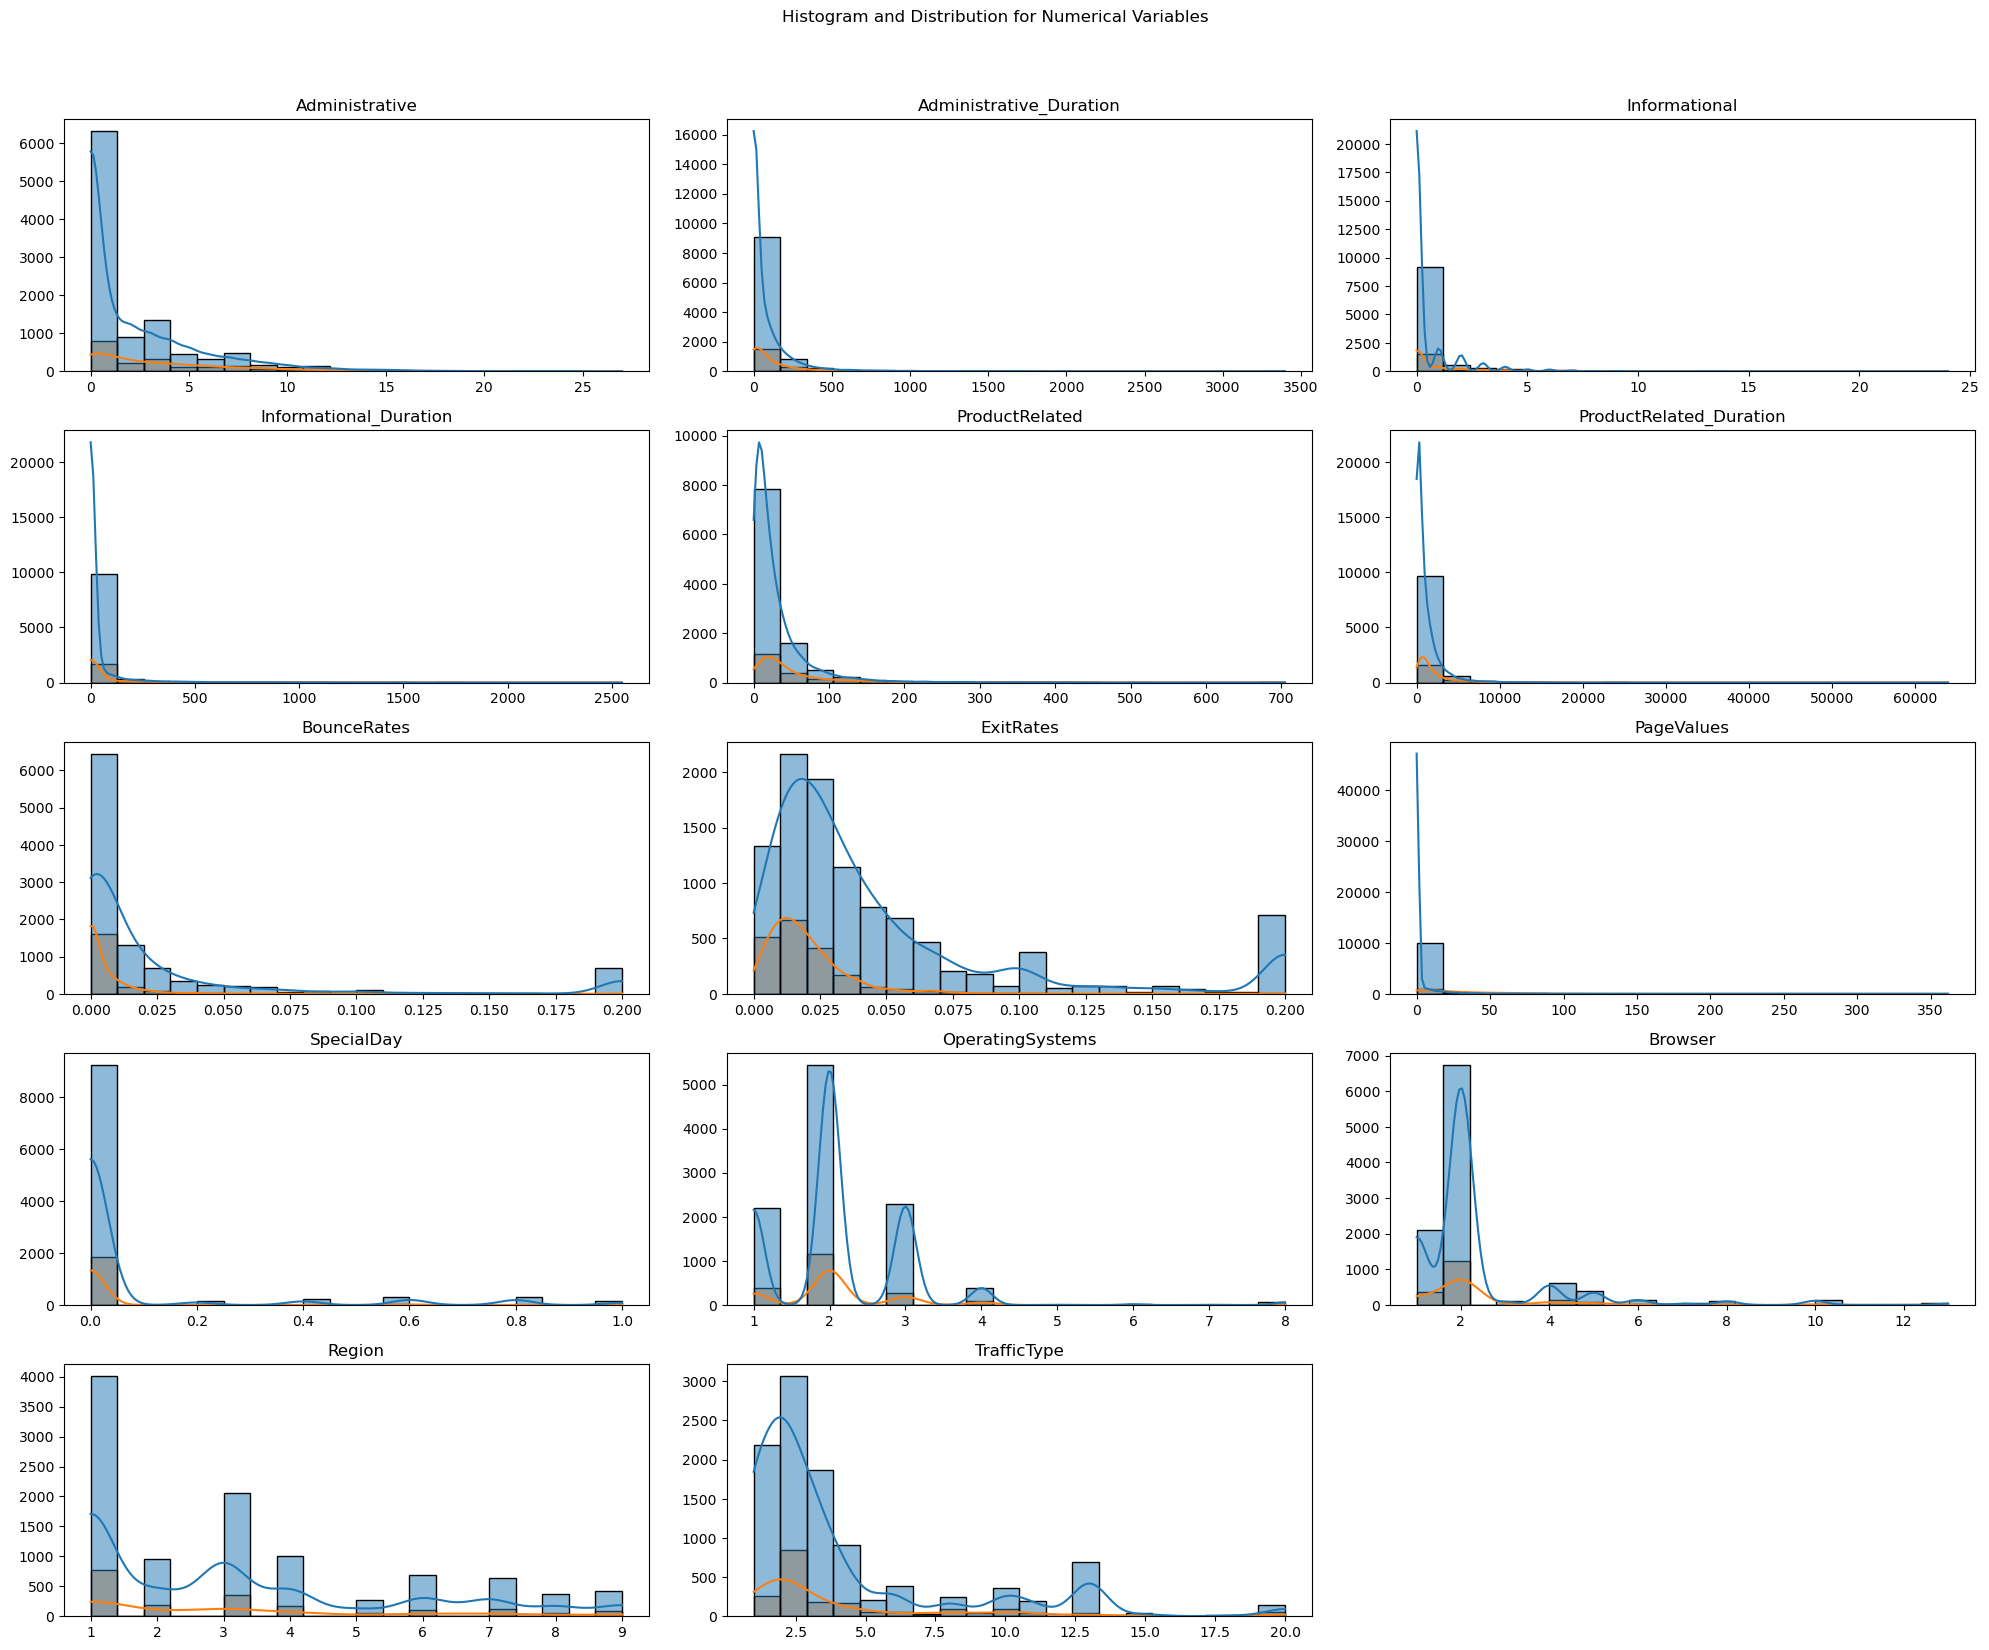

In [39]:
# Set up the layout for subplots with 3 histograms per column
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(20, 22))
fig.suptitle('Histogram and Distribution for Numerical Variables', y=1.02)

# Plotting histograms for each numerical feature with default color for bars
for i, feature in enumerate(numerical_features):
    row, col = i // 3, i % 3
    sns.histplot(data, x=feature, bins=20, kde=True, ax=axes[row, col], hue='Revenue', legend=False)
    axes[row, col].set_title(feature)
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('')

# Remove empty subplots
for i in range(len(numerical_features), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()

plt.show()


<h3> Numerical feature influence on target variable </h3>
   
 - True indicates revenue generation
 - False indicates the opposite

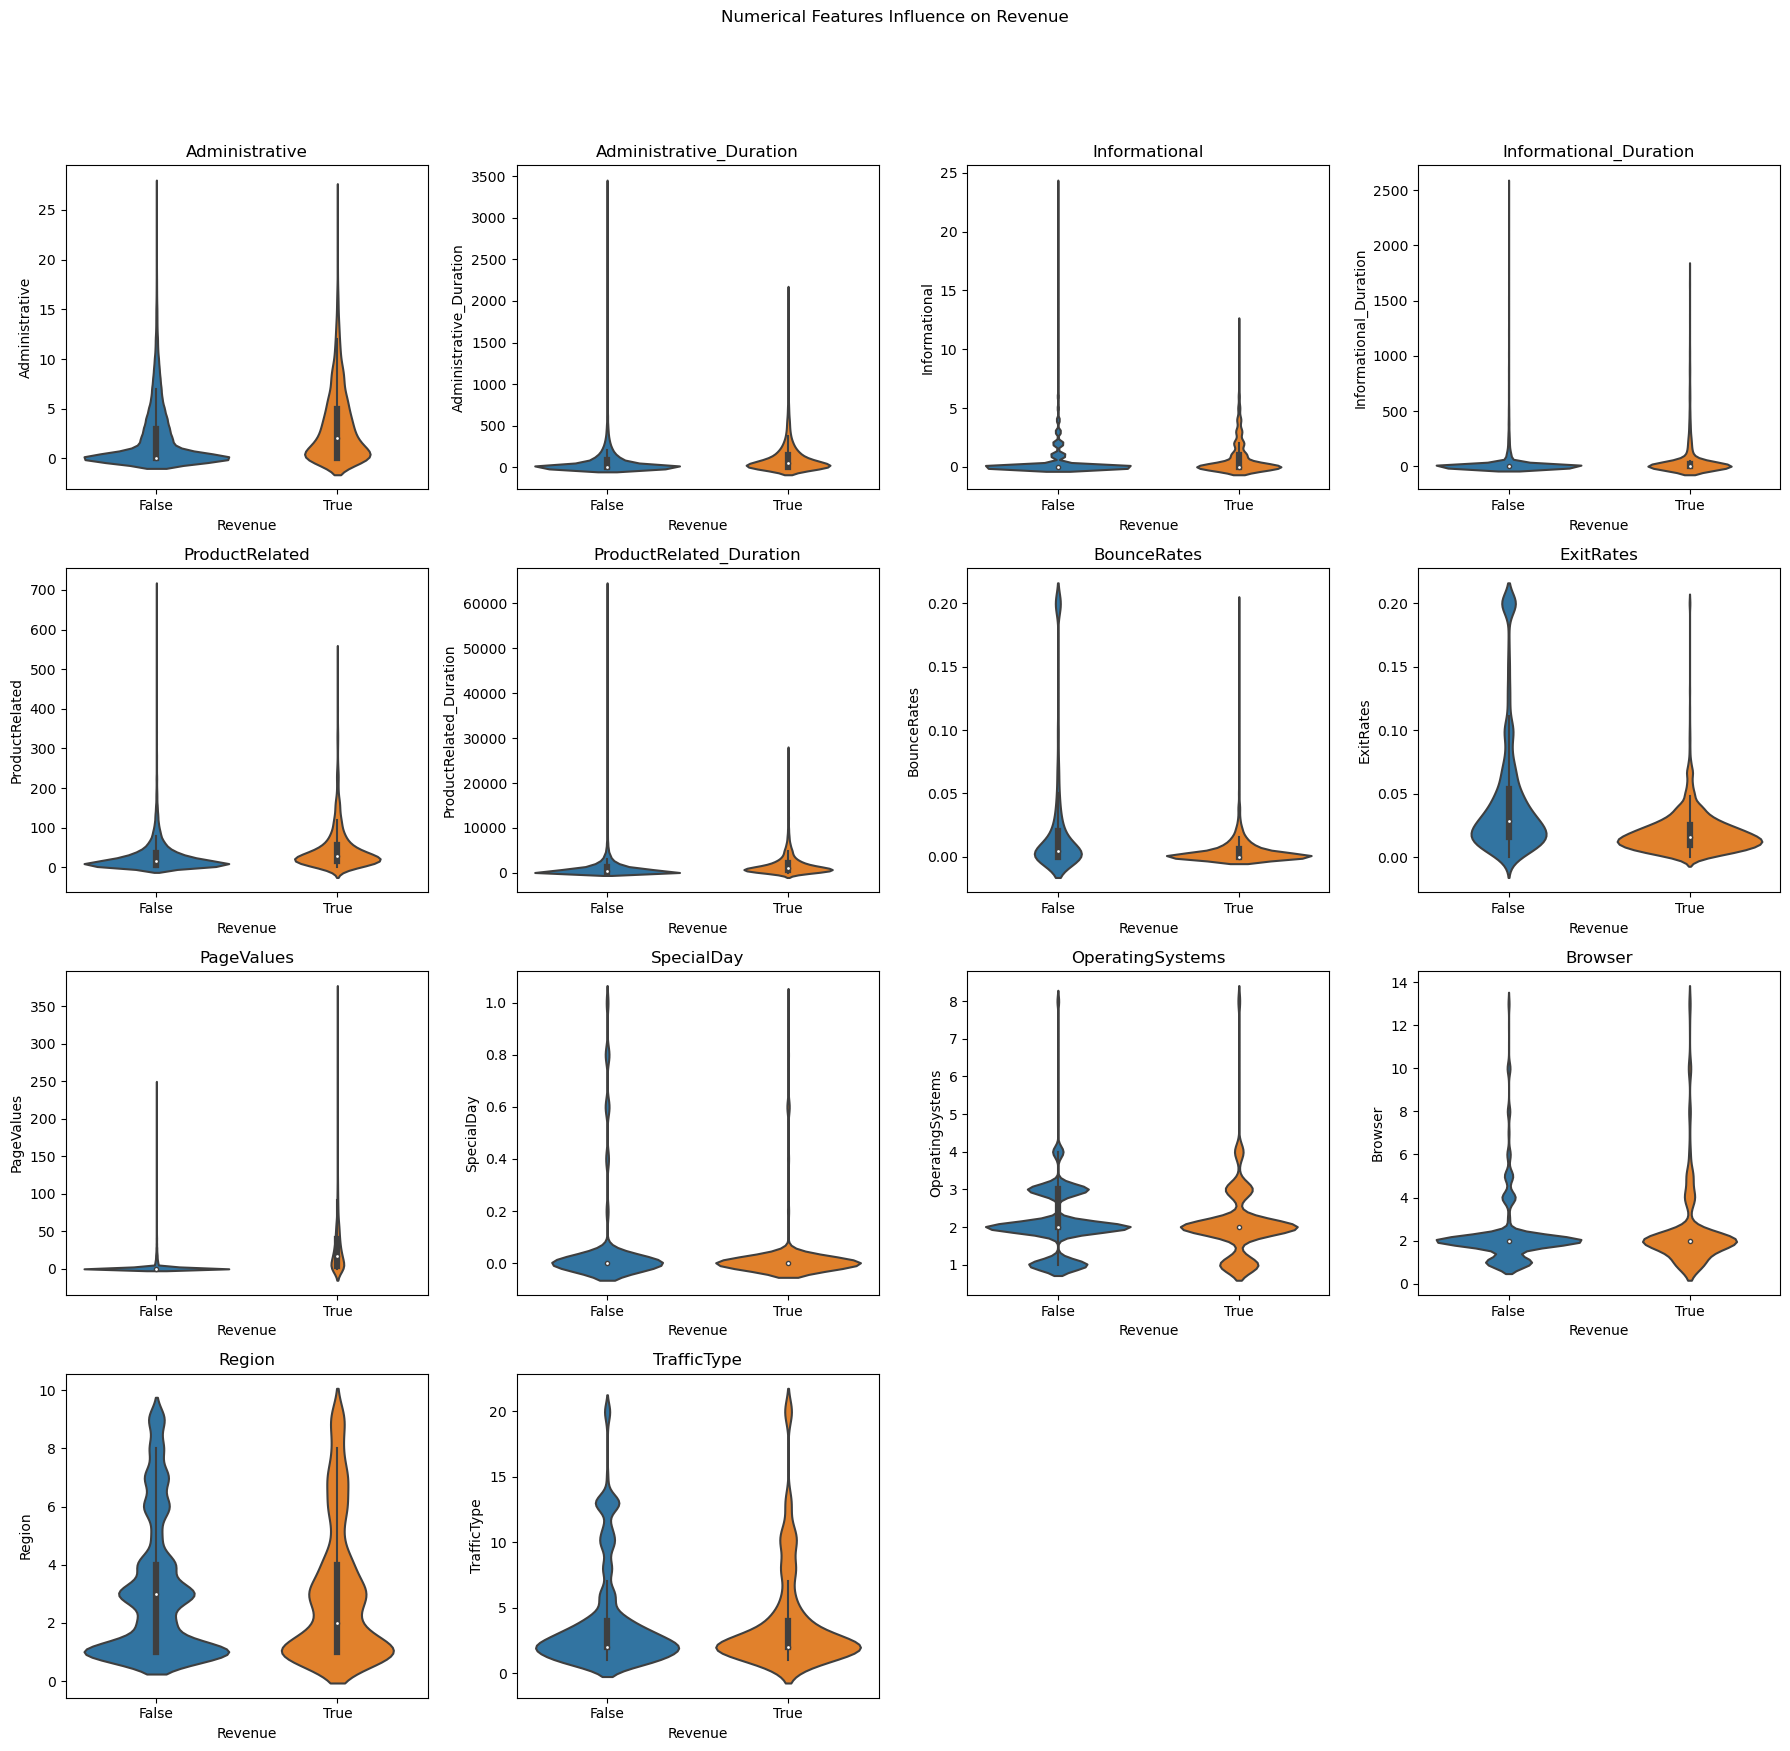

In [40]:
# Selecting numerical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Set up the layout for subplots
plt.figure(figsize=(18, 18))
plt.suptitle('Numerical Features Influence on Revenue', y=1.00)

# Plotting boxplots for each numerical feature against Revenue
for i, col in enumerate(numerical_features):
    plt.subplot(4, 4, i+1)
    sns.violinplot(x='Revenue', y=col, data=data)
    plt.title(col)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<h3> Boxplots for numerical variables </h3>

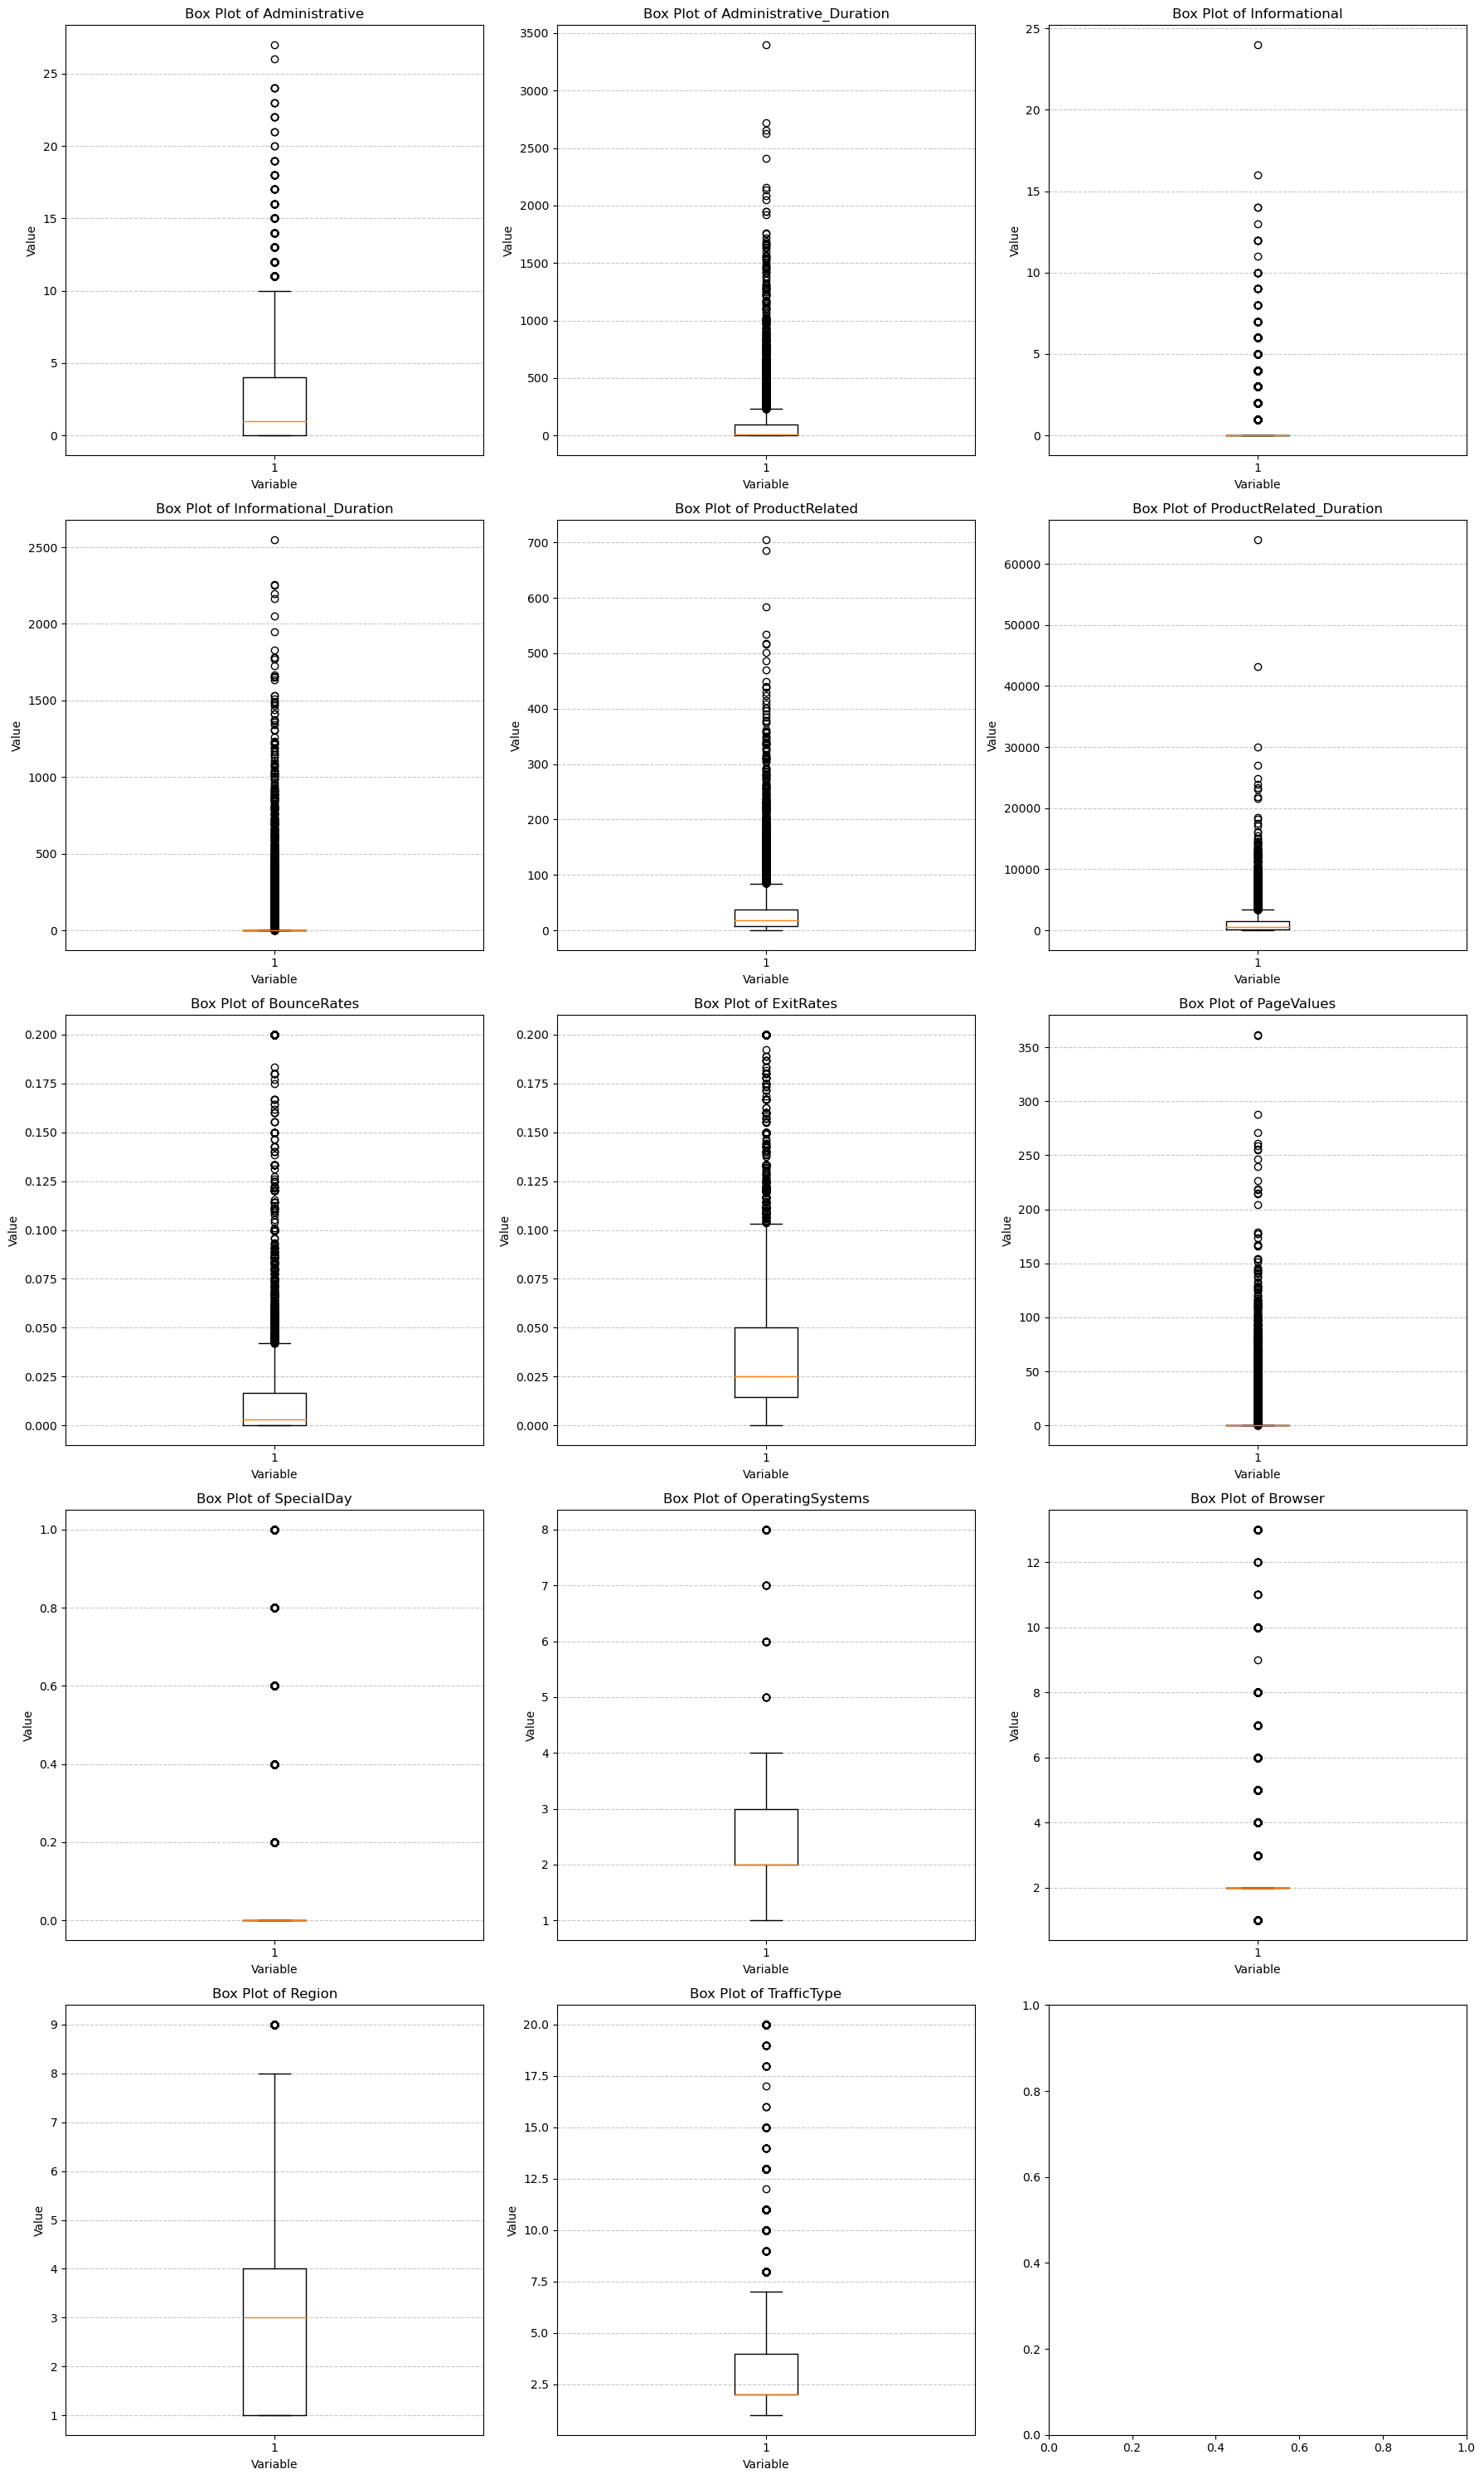

In [41]:
import matplotlib.pyplot as plt

# Assuming you have data stored in the DataFrame 'data'

# Selecting numerical features
numerical_features = data.select_dtypes(include=['float64', 'int64'])

# Get the number of columns in the numerical data
num_cols = numerical_features.shape[1]

# Calculate the number of rows and columns for subplot layout
num_rows = (num_cols + 2) // 3
num_cols_per_row = min(num_cols, 3)

# Create a grid of subplots for the box plots with a slightly larger size
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(18, 6*num_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate over each column in the numerical data and create a separate box plot for each
for i, column in enumerate(numerical_features.columns):
    ax = axes[i]  # Select the current subplot
    ax.boxplot(numerical_features[column])
    ax.set_title(f'Box Plot of {column}')
    ax.set_ylabel('Value')
    ax.set_xlabel('Variable')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


<h3> Descriptive Analysis for Categorical variables</h3>

In [42]:
data.describe(include = 'object')

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


<h3> Descriptive Analysis for Binary Categorical variables </h3>

In [43]:
data.describe(include = 'bool')

,Weekend,Revenue
count,12330,12330
unique,2,2
top,False,False
freq,9462,10422


<h3> In-depth analysis on the Month variable </h3>

- True = A sale was completed
- False = The sale did not go through
- Based on results obtained, it seems that only august, december, and february have both true and false data. The other months do not have occurences of both

In [44]:
Month_result = data.groupby(['Month','Revenue'])['Revenue'].agg(['count']).reset_index()
Month_result.head()

,Month,Revenue,count
0,Aug,False,357
1,Aug,True,76
2,Dec,False,1511
3,Dec,True,216
4,Feb,False,181


<h3> Bar Chart for monthly visitor trends </h3>

- Note that March - May and Nov - Dec seem to experience high visitor traffic

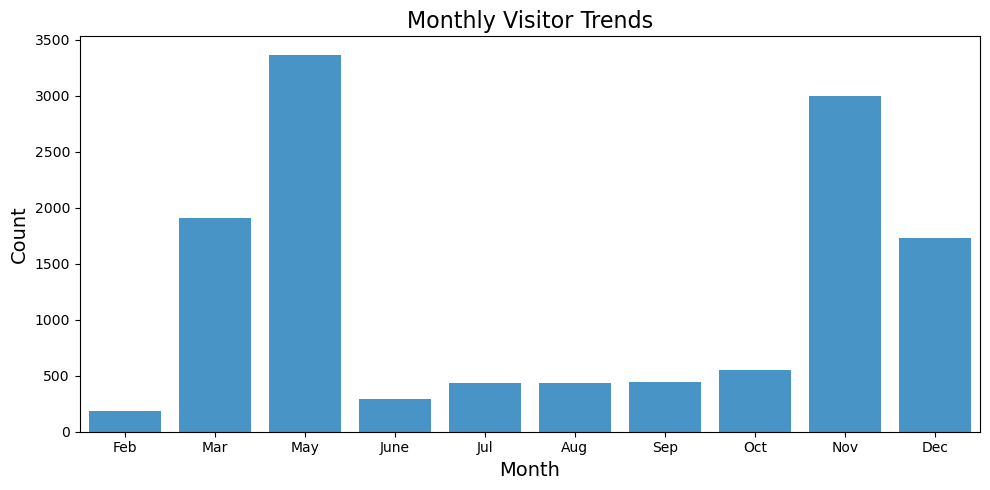

In [45]:
# Set color palette
blue = ["#3498db"]  # Define blue color

# Create a countplot
plt.figure(figsize=(10, 5))
sns.countplot(x='Month', data=data, order=['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], palette=blue)

# Set title and labels
plt.title('Monthly Visitor Trends', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()


<h3> Bar Chart for Visitor Type </h3>

- Majority of visitors have visited at least one before

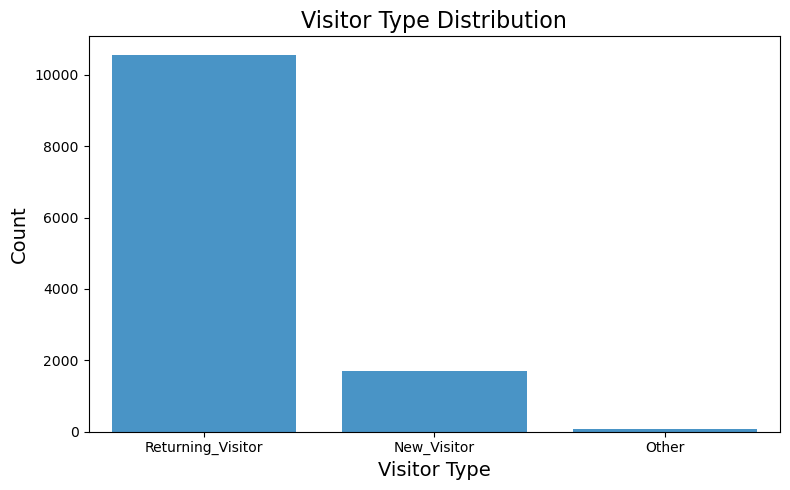

In [46]:
# Set color palette
blue = ["#3498db"]  # Define blue color

# Create a countplot
plt.figure(figsize=(8, 5))
sns.countplot(x='VisitorType', data=data, palette=blue)

# Set title and labels
plt.title('Visitor Type Distribution', fontsize=16)
plt.xlabel('Visitor Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()


<h3> Bar Chart for Weekend Variable </h3>

- Based on the findings, most of our visitors visit on the weekdays
- Even after averaging based on day, weekdays have more visitors compared to weekend by 143.0 on average

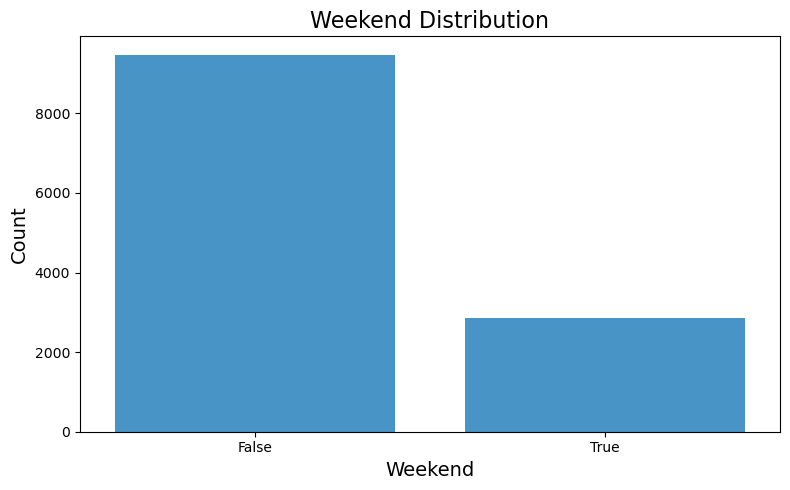

Count of 'Yes' in Weekend column: 2868
Count of 'No' in Weekend column: 9462
Average Weekend Count:  1434.0
Average Weekday Count:  1577.0


In [47]:
# Set color palette
blue = ["#3498db"]  # Define blue color

# Create a countplot
plt.figure(figsize=(8, 5))
sns.countplot(x='Weekend', data=data, palette=blue)

# Set title and labels
plt.title('Weekend Distribution', fontsize=16)
plt.xlabel('Weekend', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

# Count the number of "Yes" and "No" values in the "Weekend" column
weekend_counts = data['Weekend'].value_counts()

# Display the count of "Yes" and "No" values
print("Count of 'Yes' in Weekend column:", weekend_counts[True])
print("Count of 'No' in Weekend column:", weekend_counts[False])

# Display the average for both weekday and weekend
print("Average Weekend Count: ", weekend_counts[True]/2)
print("Average Weekday Count: ", weekend_counts[False]/6)

<h3> Descriptive Analysis on the PageValues Variable </h3>

- Based on results, the higher the page value, the more likely a visitor will make a purchase

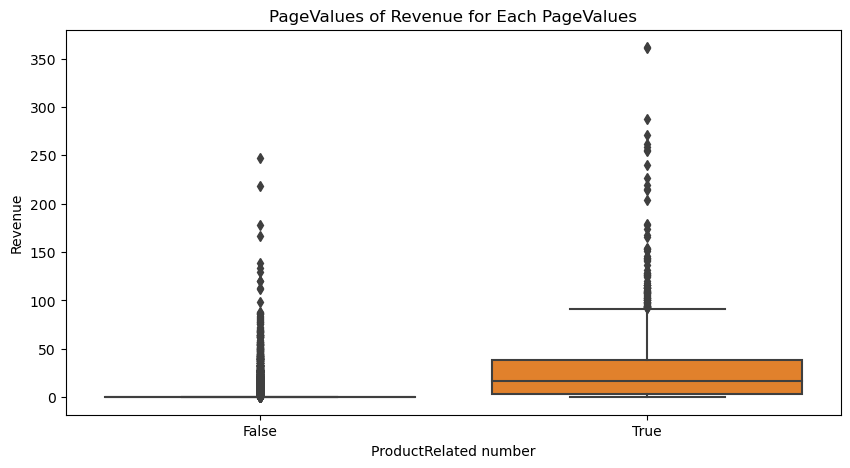

In [48]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Revenue', y='PageValues', data=data)
plt.title("PageValues of Revenue for Each PageValues")
plt.xlabel("ProductRelated number")
plt.ylabel("Revenue")
plt.show()

<h3> In-depth analysis to discover the relationship betweeen ExitRates and BounceRates </h3>

- Positive linear correlation
- An increase in exit rates is associated with a tendency for higher bounce rates.

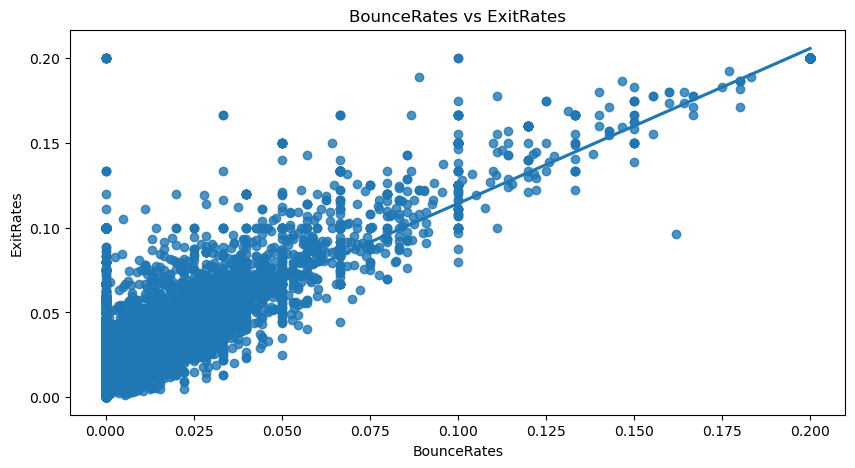

In [49]:
plt.figure(figsize=(10, 5))
sns.regplot(x='BounceRates', y='ExitRates', data=data)
plt.title("BounceRates vs ExitRates")
plt.xlabel("BounceRates")
plt.ylabel("ExitRates")
plt.show()

<h3> Data Separation </h3>

- Now that analysis on the variables have been conducted, we will split the data according to attributes


In [50]:
# Separate quantitative data (integers)
quantitative_data = data.iloc[:, [0,1,2,3,4,5,6,7,8,9]]

# Separate discrete data (counts)
discrete_data = data.iloc[:, [0,2,4]]

# Separate continuous data (measurements)
continuous_data = data.iloc[:, [1,3,5,6,7,8,9]]

# Separate categorical data which consist of nominal, binary, and ordinal
cat_data = data.iloc[:, [10,11,12,13,14,15,16,17]]

# Separate nominal categorical data
nom_data = data.iloc[:, [10,11,12,13,14]]

# Separate ordinal categorical data (no ordinal data)
ord_data = data.iloc[:, []]

# Separate binary categorical data
bin_data = data.iloc[:, [15,16,17]]

data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


<h2> Data Preprocecssing </h2>

- Null values have already been checked in the beginning

- Boolean variables (categorical) do not need to be changed into numerical format

<h3> Label Encoding </h3>

In [51]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column in cat_data
for column in data.columns:
    # Check if the column contains non-numeric data
    if data[column].dtype == 'object':
        # Fit and transform the column with label encoding
        data[column] = label_encoder.fit_transform(data[column])

# Display the encoded DataFrame
print(data.head())


   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0      2                 1   
1         0.00       0.10         0.0         0.0      2

<h3> Standardization </h3> 

- standardize quantitative data for checking correlation <br>
- we use the most basic <b>STANDARD SCALER</b> <br>
- it is a method provided by scikit-learn and it is less sensitive to outliers, making it robust to outliers that might skew up the scaling process

In [52]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import joblib

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the quantitatve_data
scaled_data = scaler.fit_transform(quantitative_data)

quantitative_data = pd.DataFrame(scaled_data, columns=quantitative_data.columns)

scaler_filename = 'standard_scaler.pkl'
joblib.dump(scaler, scaler_filename)

quantitative_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821


<h3> Correlation Heatmap </h3>

- Bounce Rate, Exit Rate, Special Day, and Visitor Type are dropped negative correlation with revenue

- Positive value means positive correlation while negative value means negative correlation. 

- The darker the color, the higher the value (closer to +1), the stronger the dependency / relationship between the feature and target variable. Vice versa for the lighter color.

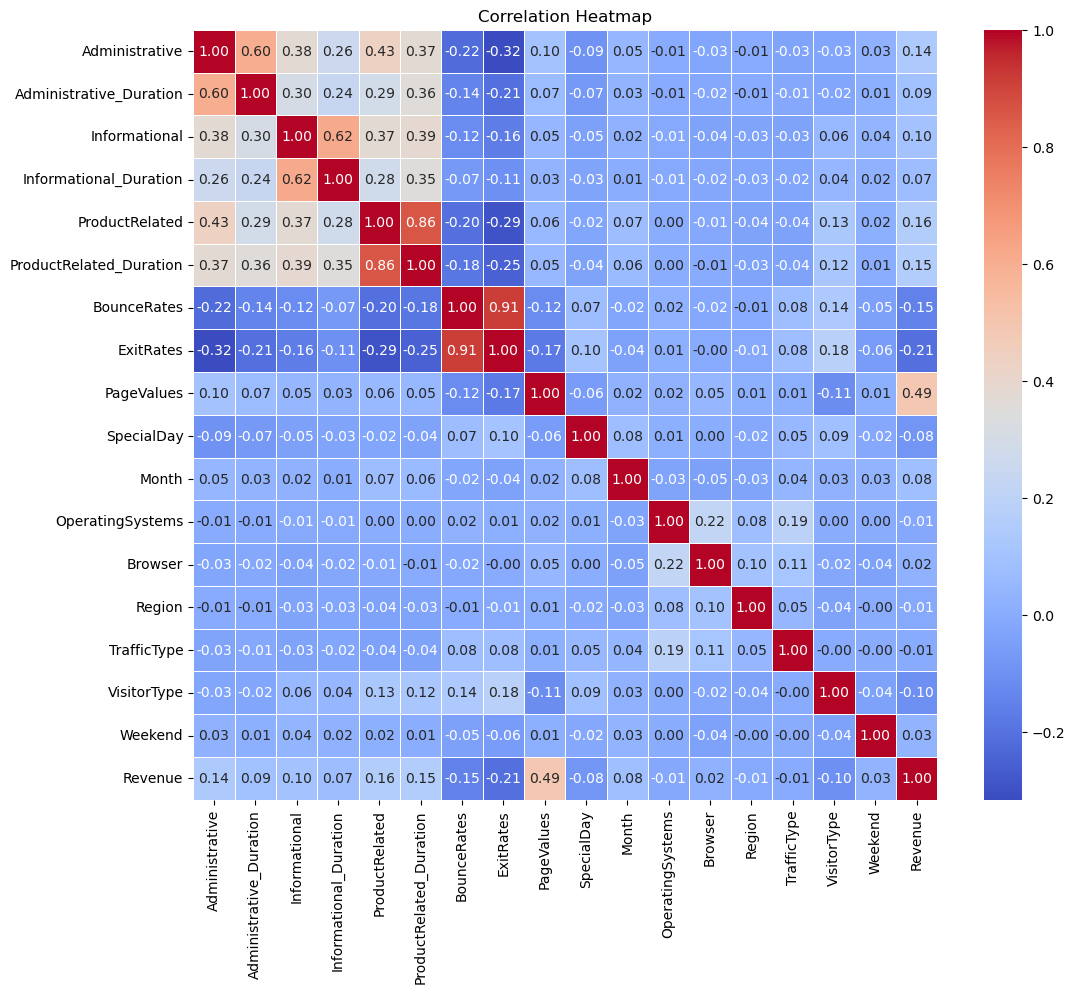

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


<h3> Dropping unnecessary variables </h3>

- We are dropping bounce rates, exit rates, visitor type, special day since it has negative, thus negative correlation. 
- It has extremely weak relationship with the target variables, hence, are removed to increase the consistency and accuracy of modeling later on.

In [54]:
common_columns = data.columns.intersection(quantitative_data.columns)
data1 = data.drop(columns=common_columns).copy()
data2 = quantitative_data.drop(columns=['BounceRates', 'ExitRates'])

data3 = pd.concat([data2, data1], axis=1)
final_data = data3.drop(columns=['VisitorType', 'SpecialDay'])

In [55]:
final_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,-0.317178,2,1,1,1,1,False,False
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.317178,2,2,2,1,2,False,False
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,-0.317178,2,4,1,9,3,False,False
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,-0.317178,2,3,2,2,4,False,False
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.317178,2,3,3,1,4,True,False


<h2> Numerically encode Input Data </h2> 

- encode all data into numeric and then display the data types of the combined dataframe 

In [56]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column in final_data
for column in final_data.columns:
    # Check if the column contains non-numeric data
    if final_data[column].dtype == 'object' or final_data[column].dtype== 'bool':
        # Fit and transform the column with label encoding
        final_data[column] = label_encoder.fit_transform(final_data[column])

# Display the encoded DataFrame
print(final_data.head())

   Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931       -0.691003                -0.624348   
1               -0.244931       -0.668518                -0.590903   
2               -0.244931       -0.691003                -0.624348   
3               -0.244931       -0.668518                -0.622954   
4               -0.244931       -0.488636                -0.296430   

   PageValues  Month  OperatingSystems  Browser  Region  TrafficType  Weekend  \
0   -0.317178      2                 1        1       1            1        0   
1   -0.317178      2                 2        2   

<h2>Label Encode Output </h2>

- print unique classes and their corresponding encoded values <br> 
- <b>Positive (TRUE) = 1      Negative (FALSE) = 0 </b>

In [57]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable with label encoding
encoded_target = label_encoder.fit_transform(data['Revenue'])

# Display the unique classes and their encoded values
print("Encoded target classes:", label_encoder.classes_)
print("Encoded target values:", encoded_target)


Encoded target classes: [False  True]
Encoded target values: [0 0 0 ... 0 0 0]


<h2> Data Splitting </h2> 

Splitting of data into training and testing set (80/20) by referencing <br>
<a href="https://onlinelibrary.wiley.com/doi/full/10.1002/sam.11583">Click the Reference...</a> <br>

In [58]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = final_data[column]  # Features
y = encoded_target  # Target variable

# Split the data into training and testing sets with 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set:")
print("Features shape:", X_train.shape)
print("Target shape:", y_train.shape)
print("\nTesting set:")
print("Features shape:", X_test.shape)
print("Target shape:", y_test.shape)


Training set:
Features shape: (9864,)
Target shape: (9864,)

Testing set:
Features shape: (2466,)
Target shape: (2466,)


# Modeling 
<h2><u> 1. Support Vector Machines (SVM)</u></h2>

<h3> a. Generate Classification Report </h3>

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import time

# Reshape X to have a single feature
X = X.values.reshape(-1, 1)

# Split the data into training and testing sets with 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM classifier on the training data
start_time = time.time()
svm_model.fit(X_train, y_train)
training_time = time.time() - start_time

# Predict the target labels on the testing data
start_time = time.time()
y_pred = svm_model.predict(X_test)
prediction_time = time.time() - start_time

# Generate classification report
classification_rep = classification_report(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", classification_rep)

# Print accuracy, training time, and prediction time
print("Accuracy:", accuracy)
print("Training Time:", training_time, "seconds")
print("Prediction Time:", prediction_time, "seconds")


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2055
           1       1.00      1.00      1.00       411

    accuracy                           1.00      2466
   macro avg       1.00      1.00      1.00      2466
weighted avg       1.00      1.00      1.00      2466

Accuracy: 1.0
Training Time: 0.003094911575317383 seconds
Prediction Time: 0.0009076595306396484 seconds


<h3> b. Confusion Matrix </h3>

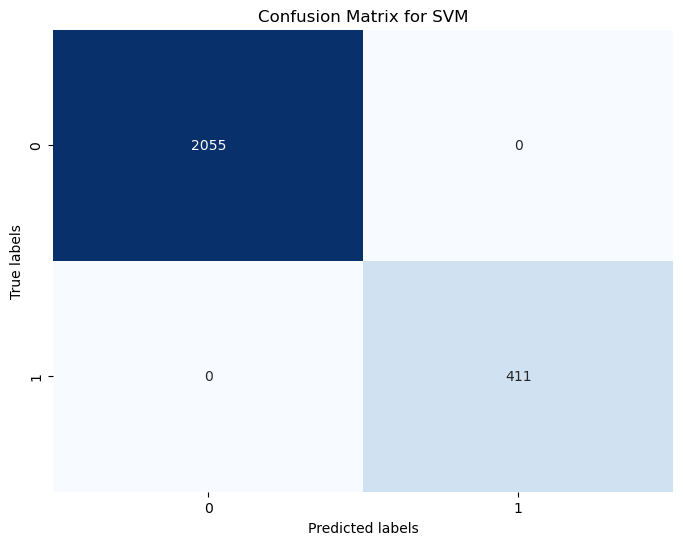

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for SVM")
plt.show()


<h2><u> 2. K Nearest Neighbors (KNN)</u></h2>

<h3> a. Generate Classification Report </h3>

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Initialize KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier on the training data
start_time = time.time()
knn_model.fit(X_train, y_train)
training_time_knn = time.time() - start_time

# Predict the target labels on the testing data
start_time = time.time()
y_pred_knn = knn_model.predict(X_test)
prediction_time_knn = time.time() - start_time

# Generate classification report for KNN
classification_rep_knn = classification_report(y_test, y_pred_knn)

# Calculate accuracy for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Print the classification report for KNN
print("Classification Report for KNN:\n", classification_rep_knn)

# Print accuracy, training time, and prediction time for KNN
print("Accuracy for KNN:", accuracy_knn)
print("Training Time for KNN:", training_time_knn, "seconds")
print("Prediction Time for KNN:", prediction_time_knn, "seconds")


Classification Report for KNN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2055
           1       1.00      1.00      1.00       411

    accuracy                           1.00      2466
   macro avg       1.00      1.00      1.00      2466
weighted avg       1.00      1.00      1.00      2466

Accuracy for KNN: 1.0
Training Time for KNN: 0.006407260894775391 seconds
Prediction Time for KNN: 0.16489768028259277 seconds


<h3> b. Confusion Matrix </h3>

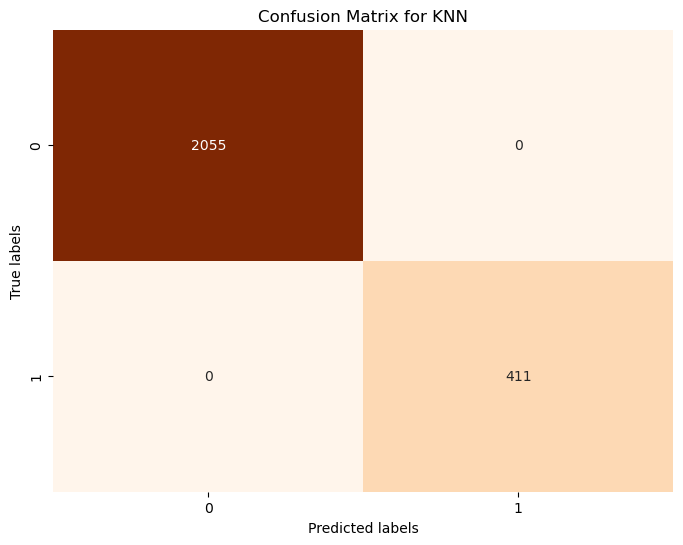

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Plot heatmap for KNN confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for KNN")
plt.show()


<h2><u> 3. Random Forest (RF)</u></h2>

<h3> a. Generate Classification Report </h3>

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import time

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier on the training data
start_time = time.time()
rf_model.fit(X_train, y_train)
training_time_rf = time.time() - start_time

# Predict the target labels on the testing data
start_time = time.time()
y_pred_rf = rf_model.predict(X_test)
prediction_time_rf = time.time() - start_time

# Generate classification report for Random Forest
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Calculate accuracy for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print the classification report for Random Forest
print("Classification Report for Random Forest:\n", classification_rep_rf)

# Print accuracy, training time, and prediction time for Random Forest
print("Model Accuracy:", accuracy_rf)
print("Training Time :", training_time_rf, "seconds")
print("Prediction Time :", prediction_time_rf, "seconds")


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2055
           1       1.00      1.00      1.00       411

    accuracy                           1.00      2466
   macro avg       1.00      1.00      1.00      2466
weighted avg       1.00      1.00      1.00      2466

Model Accuracy: 1.0
Training Time : 0.18066167831420898 seconds
Prediction Time : 0.01399993896484375 seconds


<h3> b. Confusion Matrix </h3>

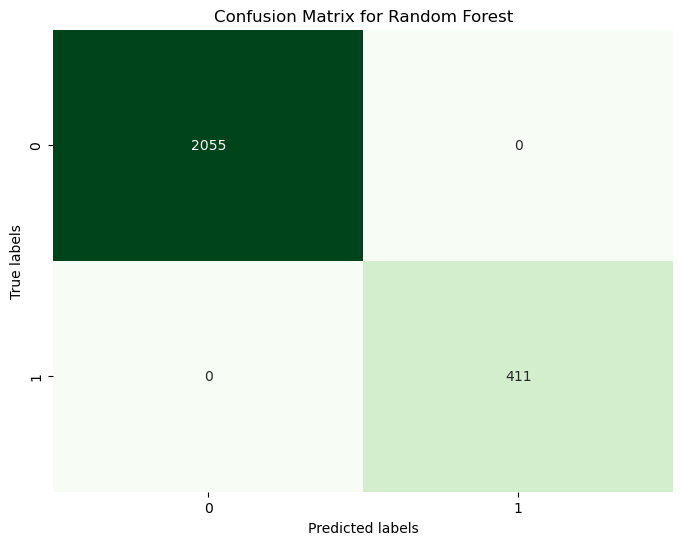

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot heatmap for Random Forest confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens", cbar=False) 
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Random Forest")
plt.show()


# Evaluation 

- we are comparing all three models in terms of accuracy, precision, recall score and f1-score

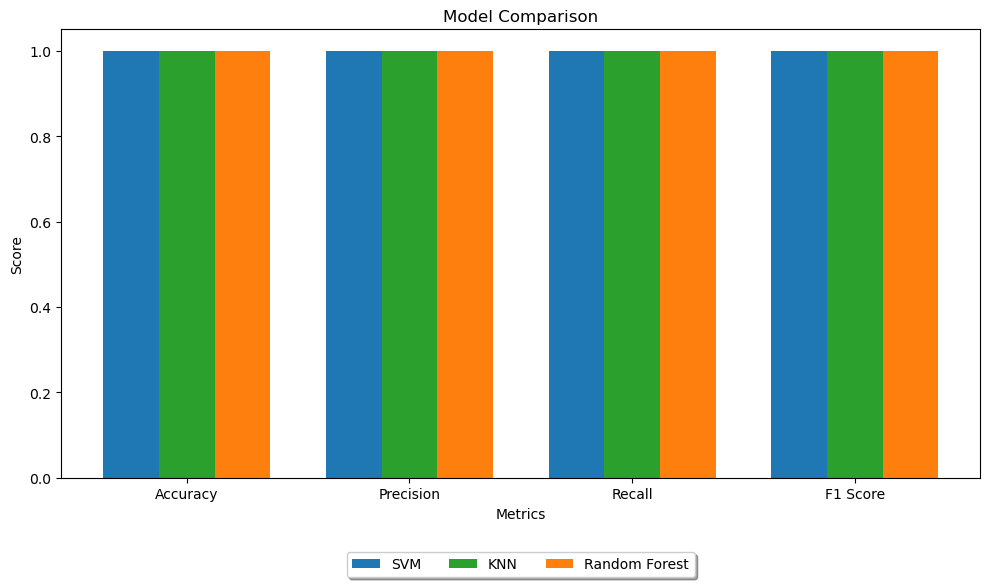

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute precision, recall, and F1-score for SVM
precision_svm = precision_score(y_test, y_pred, average='weighted')
recall_svm = recall_score(y_test, y_pred, average='weighted')
f1_score_svm = f1_score(y_test, y_pred, average='weighted')

# Compute precision, recall, and F1-score for KNN
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_score_knn = f1_score(y_test, y_pred_knn, average='weighted')

# Compute precision, recall, and F1-score for Random Forest
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_score_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Define the metrics for each model
svm_metrics = [accuracy, precision_svm, recall_svm, f1_score_svm]
knn_metrics = [accuracy_knn, precision_knn, recall_knn, f1_score_knn]
rf_metrics = [accuracy_rf, precision_rf, recall_rf, f1_score_rf]

# Define the names of metrics
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Define the number of models
num_models = len(svm_metrics)

# Set the position of each group on the x-axis
index = np.arange(num_models)

# Define the width of each bar
bar_width = 0.25

# Define the colors for each model
colors = ['#1f77b4', '#2ca02c', '#ff7f0e']

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(index, svm_metrics, bar_width, label='SVM', color=colors[0])
plt.bar(index + bar_width, knn_metrics, bar_width, label='KNN', color=colors[1])
plt.bar(index + 2 * bar_width, rf_metrics, bar_width, label='Random Forest', color=colors[2])

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks(index + bar_width, metrics_names)

# Place the legend outside of the chart
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=3)

# Show plot
plt.tight_layout()
plt.show()


<h3> Compare in terms of training and prediction time </h3>

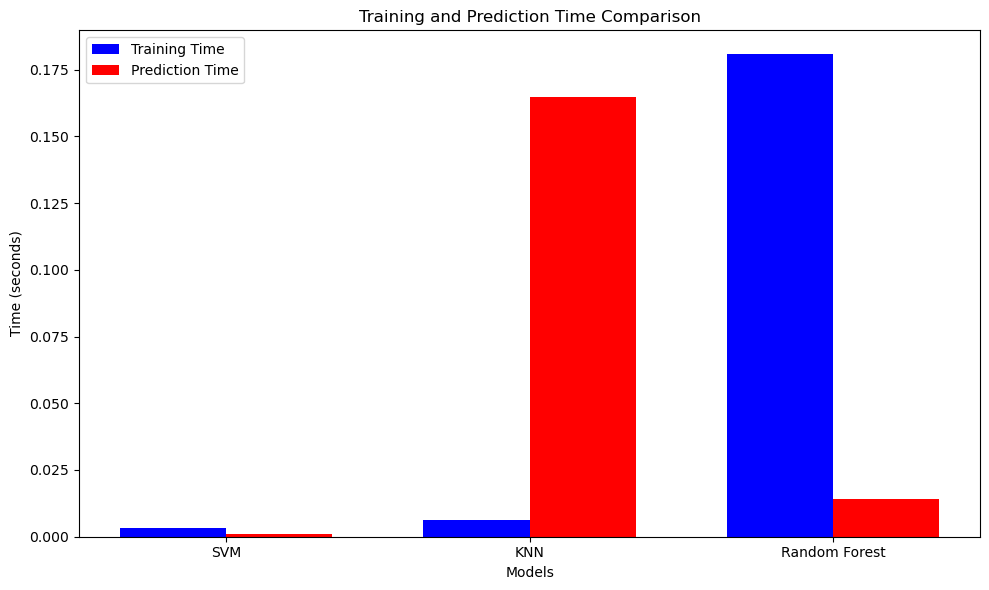

In [66]:
# Define the training and prediction times for each model
training_times = [training_time, training_time_knn, training_time_rf]
prediction_times = [prediction_time, prediction_time_knn, prediction_time_rf]

# Define the number of models
num_models = len(training_times)

# Set the position of each group on the x-axis
index = np.arange(num_models)

# Define the width of each bar
bar_width = 0.35

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(index, training_times, bar_width, label='Training Time', color='b')
plt.bar(index + bar_width, prediction_times, bar_width, label='Prediction Time', color='r')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Time (seconds)')
plt.title('Training and Prediction Time Comparison')
plt.xticks(index + bar_width / 2, ['SVM', 'KNN', 'Random Forest'])
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [67]:
import pandas as pd

# Define the metrics for each model
svm_metrics = [accuracy, precision_svm, recall_svm, f1_score_svm, training_time, prediction_time]
knn_metrics = [accuracy_knn, precision_knn, recall_knn, f1_score_knn, training_time_knn, prediction_time_knn]
rf_metrics = [accuracy_rf, precision_rf, recall_rf, f1_score_rf, training_time_rf, prediction_time_rf]

# Define the names of metrics
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Training Time (s)', 'Prediction Time (s)']

# Create a DataFrame
metrics_df = pd.DataFrame([svm_metrics, knn_metrics, rf_metrics], columns=metrics_names, index=['SVM', 'KNN', 'Random Forest'])

# Display the DataFrame
metrics_df


,Accuracy,Precision,Recall,F1 Score,Training Time (s),Prediction Time (s)
SVM,1.0,1.0,1.0,1.0,0.003095,0.000908
KNN,1.0,1.0,1.0,1.0,0.006407,0.164898
Random Forest,1.0,1.0,1.0,1.0,0.180662,0.014000


<h4> CONCLUSION : </h4> 

Since the accuracy, precision, recall and f1 score of three models are the same, we will be comparing them in terms of training and prediction time to make sure we are selecting the most efficient model. In this case, KNN has the shortest training time however the longest prediction time compared with the SVM and RF. Therefore, we decided to use SVM as our model for deployment since it has extremely short training time, with only the difference of 0.001s with the shortest and at the same time, having the shortest prediction time.

<h3> Save the best model to a file for deployment use </h3> 

In [68]:
from joblib import dump

# Save the SVM model to a file
dump(svm_model, 'best_model.pkl')

print("SVM model saved successfully.")

SVM model saved successfully.
